# Notebook de apresentação de funcionalidades de estatística descritiva e inferencial

Este notebook tem por base os dados e os notebooks:

https://www.kaggle.com/uciml/pima-indians-diabetes-database

https://www.kaggle.com/ravichaubey1506/univariate-statistical-analysis-on-diabetes

## Análise univariada

In [29]:
#Importar algumas das bibliotecas que são necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/atrigo/PyTrigo/master/Versao2/diabetes.csv')
#df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()
#Como é possível ver no resultado deste comando temos 9 colunas em que 8 são variáveis independentes (caracteristicas/features) e 1 (Outcome) a variável dependente (alvo/target)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Não serão realizadas neste dataset operações de preparação dos dados (ex. lidar com missing values)

In [31]:
#Quantas linhas (obervações) e colunas tem o dataset
df.shape

(768, 9)

In [32]:
#Tipos de dados das colunas
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
#Apresentação de estatísticas rápidas sobre os dados disponíveis nas colunas (desde que do tipo numérico)
#Aqui já estamos aentrar na análise multivariada
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Descrição dos campos no dataset dos diabetes das grávidas
* Pregancies - Number of times pregnant 
* Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure - Diastolic blood pressure (mm Hg)
* SkinThickness - Triceps skin fold thickness (mm)
* Insulin - 2-Hour serum insulin (mu U/ml)
* BMI - Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age - Age
* Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0


## Pregnancy Variable

In [35]:
#Número de gravidezes
preg_proportion = np.array(df['Pregnancies'].value_counts())
preg_num = np.array(df['Pregnancies'].value_counts().index)
preg_proportion_perc = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)
preg = pd.DataFrame({'Número de gravidezes':preg_num,'Número de grávidas':preg_proportion,'Percentagem de grávidas':preg_proportion_perc})
preg.set_index(['Número de gravidezes'],inplace=True)
preg.head(20)

,Número de grávidas,Percentagem de grávidas
Número de gravidezes,,
1,135,17
0,111,14
2,103,13
3,75,9
4,68,8
5,57,7
6,50,6
7,45,5
8,38,4


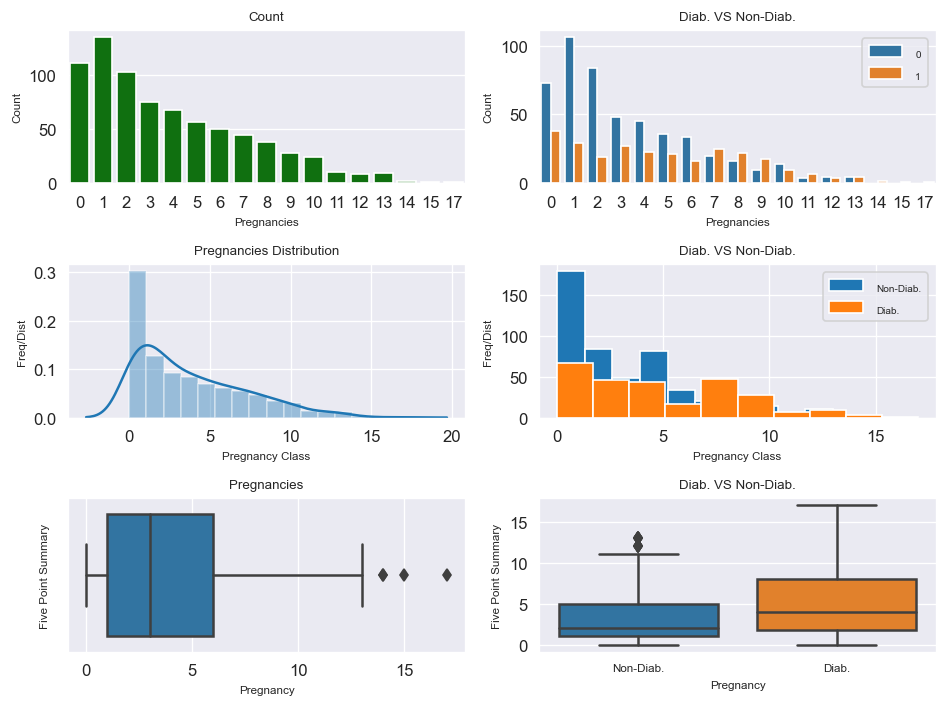

In [36]:
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.countplot('Pregnancies',data=df,ax=axes[0][0],color='green')
axes[0][0].set_title('Count',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Pregnancies',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.countplot('Pregnancies',data=df,hue='Outcome',ax=axes[0][1])
axes[0][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Pregnancies',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10 = sns.distplot(df['Pregnancies'],ax=axes[1][0])
axes[1][0].set_title('Pregnancies Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot11 = df[df['Outcome']==False]['Pregnancies'].plot.hist(ax=axes[1][1],label='Non-Diab.')
plot11_2=df[df['Outcome']==True]['Pregnancies'].plot.hist(ax=axes[1][1],label='Diab.')
axes[1][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plot11.axes.legend(loc=1)
plt.setp(axes[1][1].get_legend().get_texts(), fontsize='6') # for legend text
plt.setp(axes[1][1].get_legend().get_title(), fontsize='6') # for legend title
plt.tight_layout()

plot20 = sns.boxplot(df['Pregnancies'],ax=axes[2][0],orient='v')
axes[2][0].set_title('Pregnancies',fontdict={'fontsize':8})
axes[2][0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=axes[2][1])
axes[2][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[2][1].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
plt.tight_layout()
plt.show()

### Compreendendo a distribuição das Pregancies

Dos gráficos acima apresentados é possível constatar que mulheres que tenham estado grávidas mais vezes têm um maior risco de diabetes (pode não ser a úniva variável a contribuir para tal facto).

## Glucose Variable

In [37]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

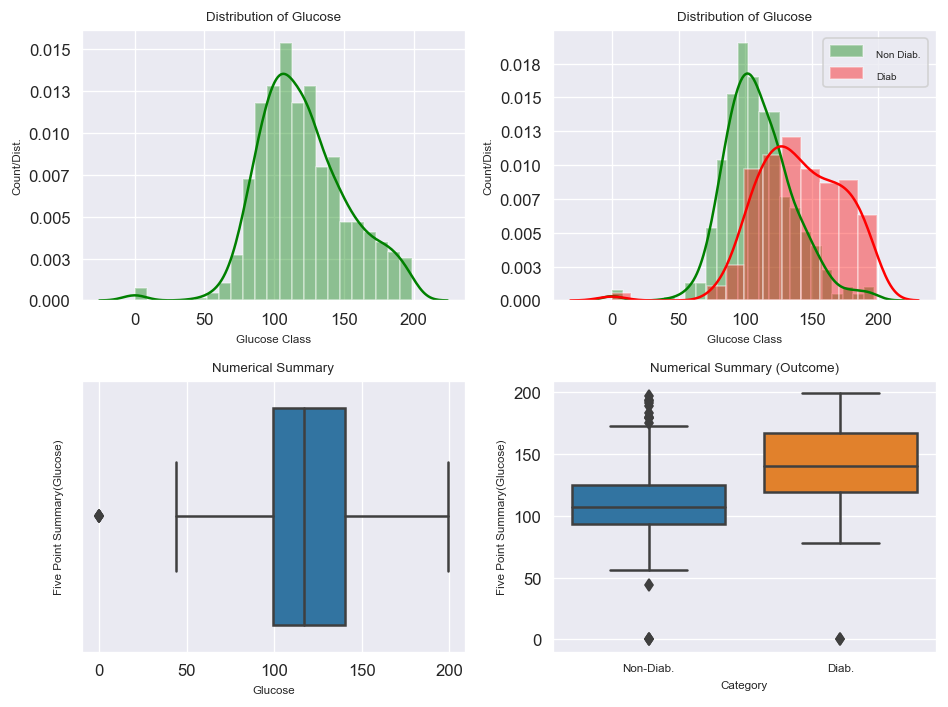

In [38]:
#sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))
plot00=sns.distplot(df['Glucose'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(df[df['Outcome']==False]['Glucose'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(df[df.Outcome==True]['Glucose'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(df['Glucose'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='Glucose',data=df,ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

### Compreendendo a distribuição da Glucose

A distribuição da Glucose nas grávidas centra-se no valor 115 com maioria dos dados entre 90 e 140. 

Existem outliers, neste caso valores com 0.

As grávidas com maior nível de Glucose têm maior risco de ter diabetes.

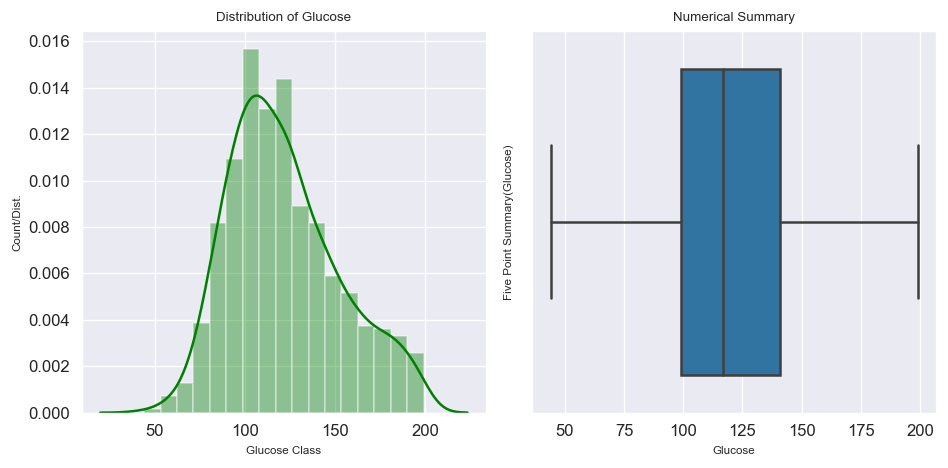

In [39]:
#Voltar a correr, mas retirando do dataset os outliers (valores 0)
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot0=sns.distplot(df[df['Glucose']!=0]['Glucose'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()
plot1=sns.boxplot(df[df['Glucose']!=0]['Glucose'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

## Blood Pressure variable

In [40]:
df.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

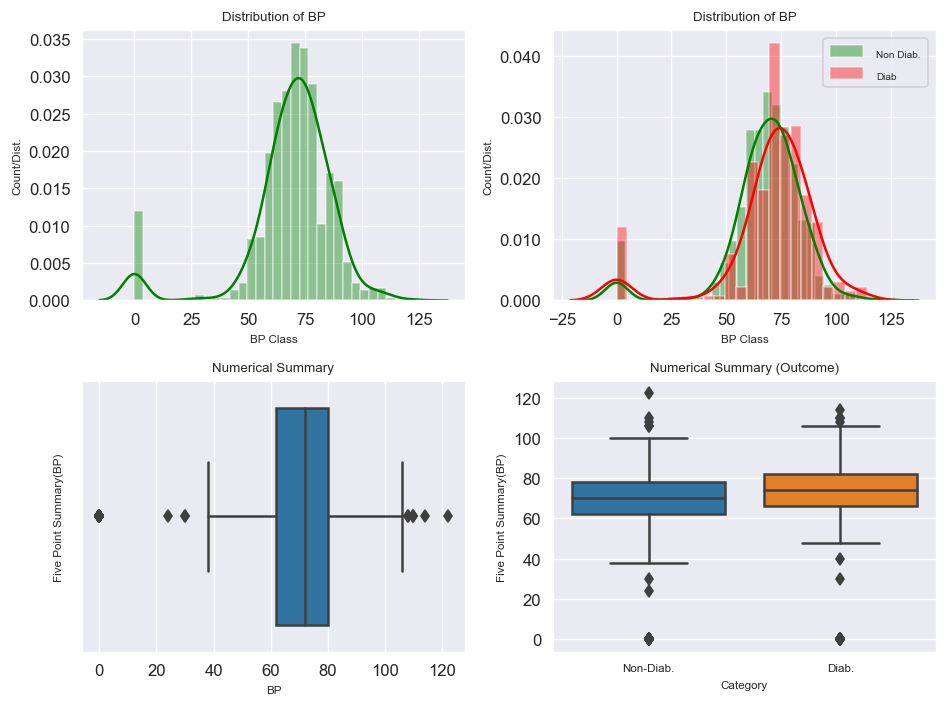

In [41]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))
plot00=sns.distplot(df['BloodPressure'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0][0].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()
plot01=sns.distplot(df[df['Outcome']==False]['BloodPressure'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(df[df.Outcome==True]['BloodPressure'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0][1].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()
plot10=sns.boxplot(df['BloodPressure'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('BP',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()
plot11=sns.boxplot(x='Outcome',y='BloodPressure',data=df,ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()
plt.show()

### Compreendendo a distribuição da BP

A distribuição da Glucose nas grávidas centra-se no valor 65 com maioria dos dados entre 60 e 90. 

Existem outliers, neste caso valores com 0.

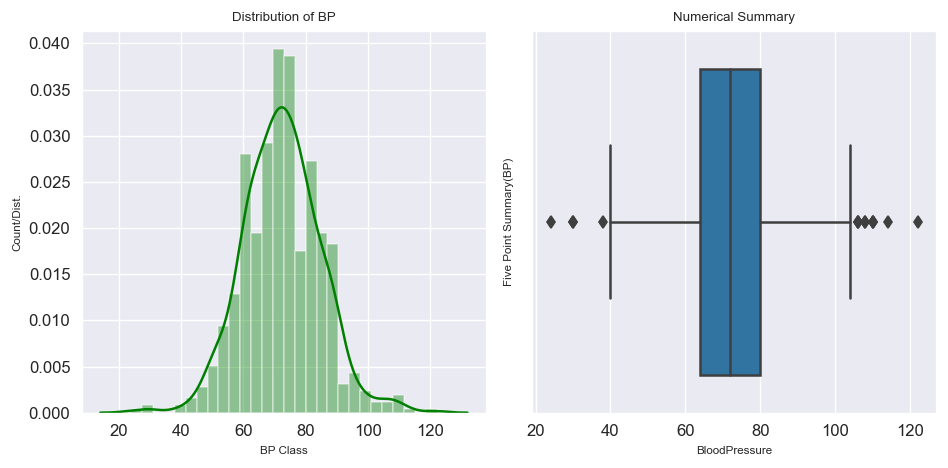

In [42]:
#Voltar a correr, mas retirando do dataset os outliers (valores 0)
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot0=sns.distplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()
plot1=sns.boxplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('BloodPressure',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()

## Análise multivariada

In [43]:
#Apresentação de estatísticas rápidas sobre os dados disponíveis nas colunas (desde que do tipo numérico)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [44]:
df['OutcomeText'] = df.Outcome.replace({0:'Non-Diab',1:'Diab'})
df.DiabetesPedigreeFunction = df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,OutcomeText
0,6,148,72,35,0,33.6,0.627,50,1,Diab
1,1,85,66,29,0,26.6,0.351,31,0,Non-Diab
2,8,183,64,0,0,23.3,0.672,32,1,Diab
3,1,89,66,23,94,28.1,0.167,21,0,Non-Diab
4,0,137,40,35,168,43.1,2.288,33,1,Diab


In [45]:
df2 = df.copy()
df2.pop('Outcome')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,OutcomeText
0,6,148,72,35,0,33.6,0.627,50,Diab
1,1,85,66,29,0,26.6,0.351,31,Non-Diab
2,8,183,64,0,0,23.3,0.672,32,Diab
3,1,89,66,23,94,28.1,0.167,21,Non-Diab
4,0,137,40,35,168,43.1,2.288,33,Diab


<Figure size 720x480 with 0 Axes>

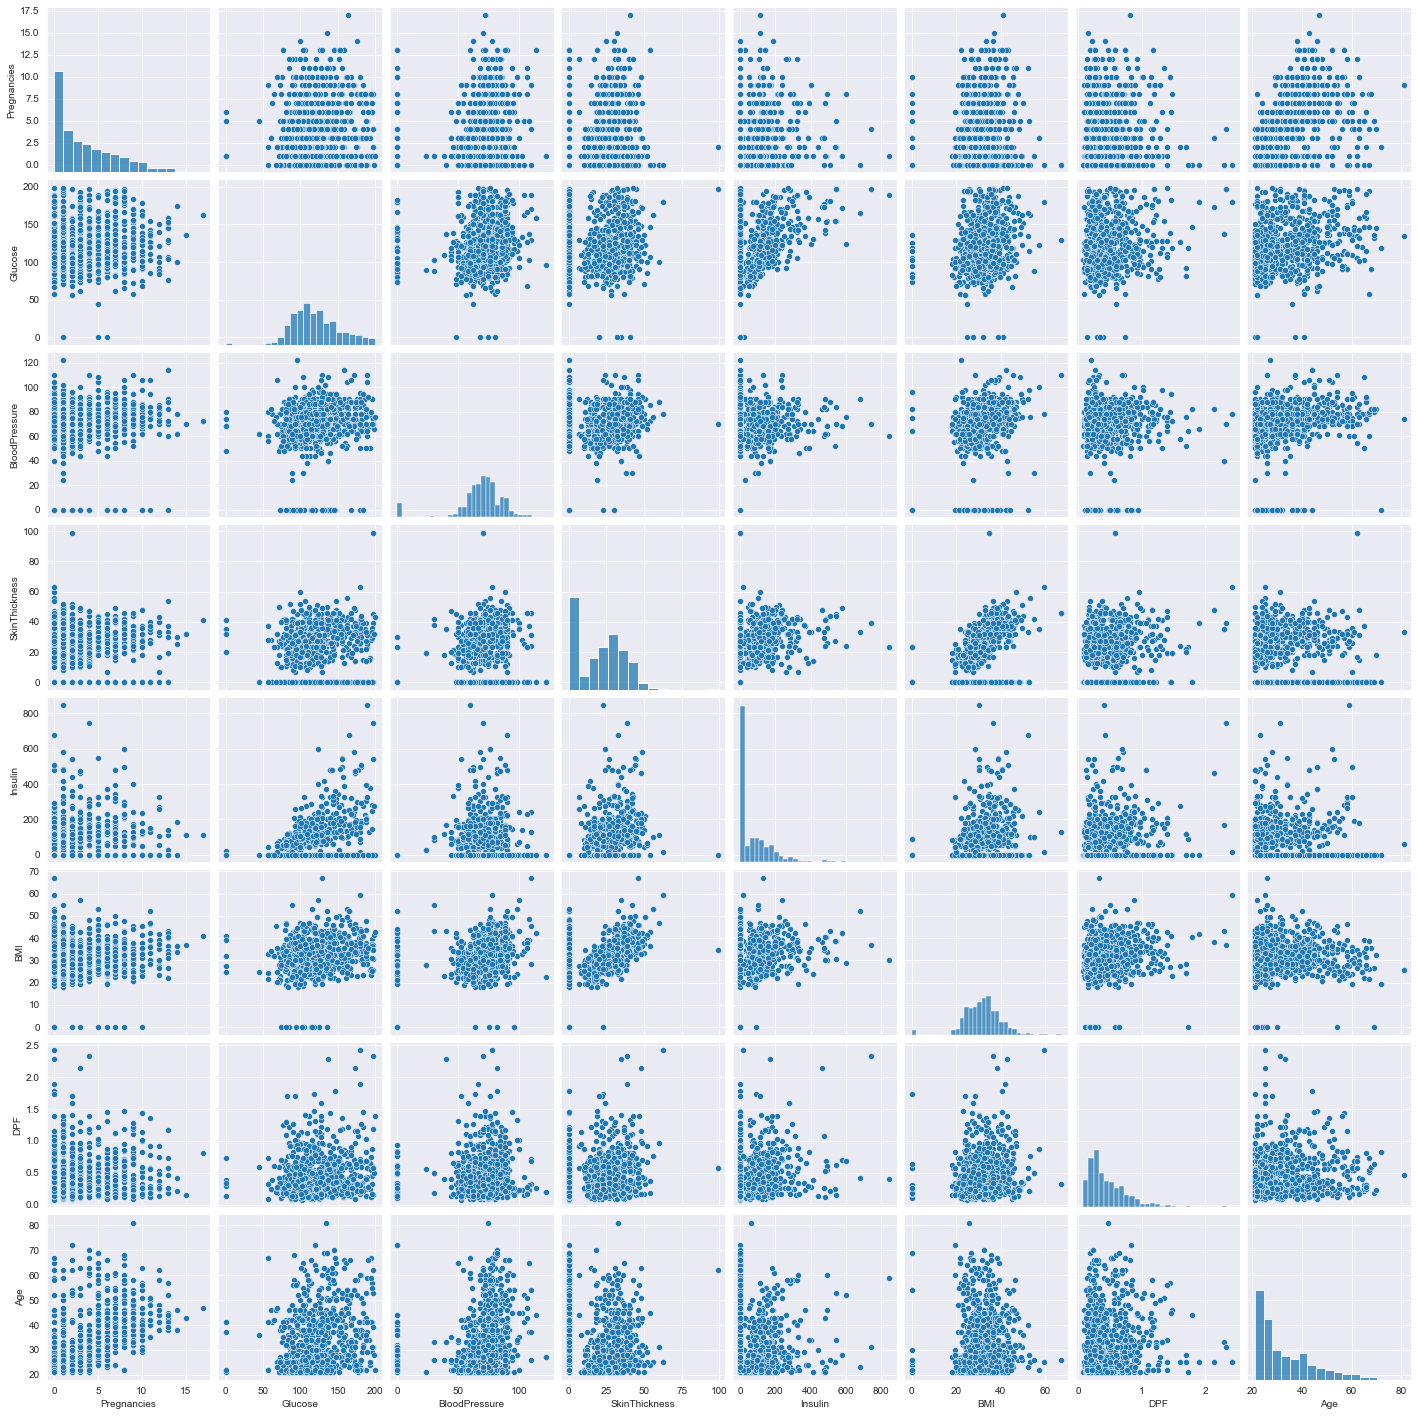

In [46]:
plt.figure(dpi=120)
sns.pairplot(df2)
plt.show()

<Figure size 720x480 with 0 Axes>

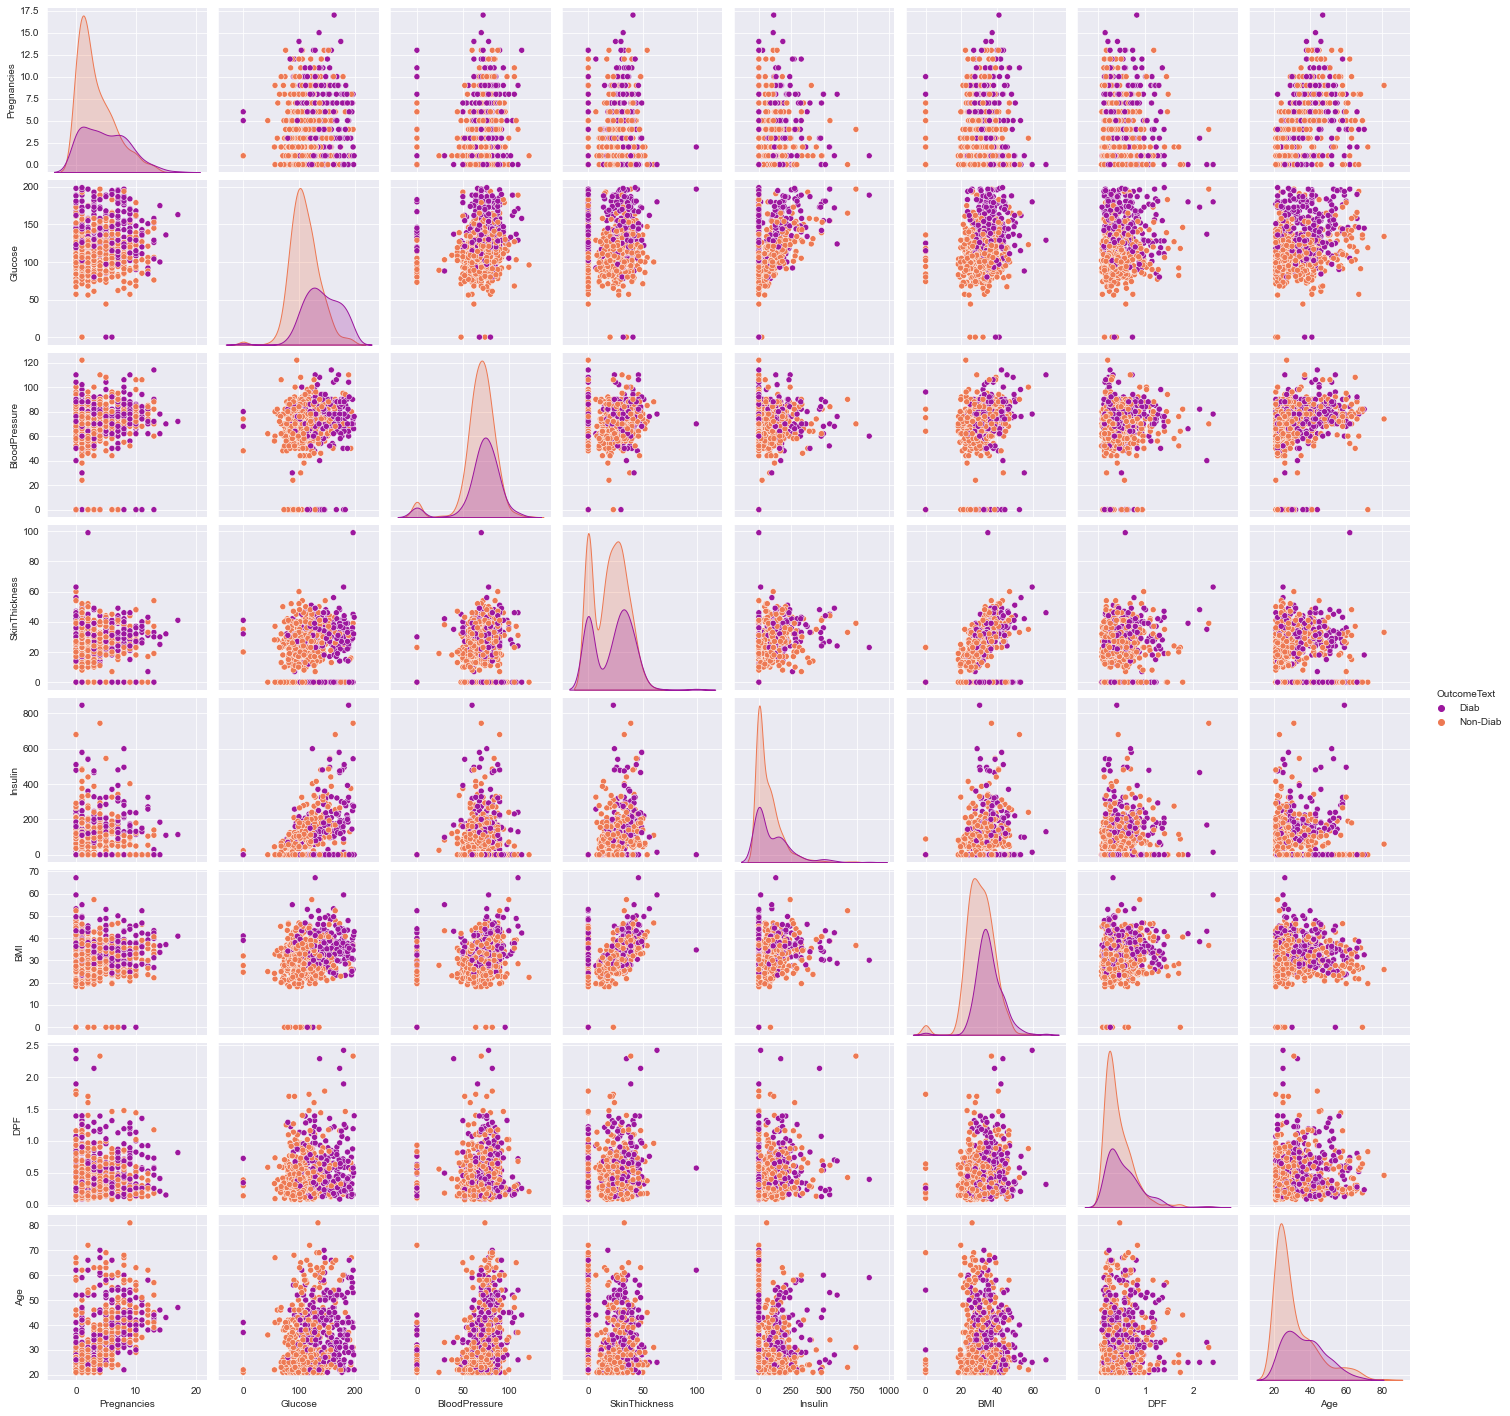

In [47]:
plt.figure(dpi = 120)
sns.pairplot(df2,hue = 'OutcomeText',palette = 'plasma')
plt.show()

### Correlação entre as diferentes variáveis

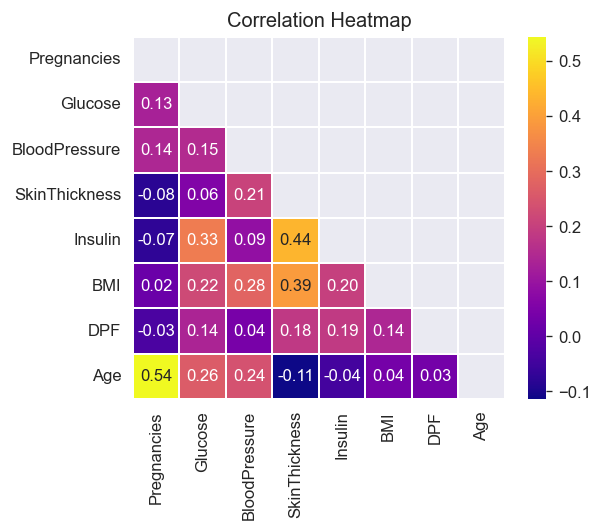

In [48]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df2.corr(),dtype = bool))
sns.heatmap(df2.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 600x480 with 0 Axes>

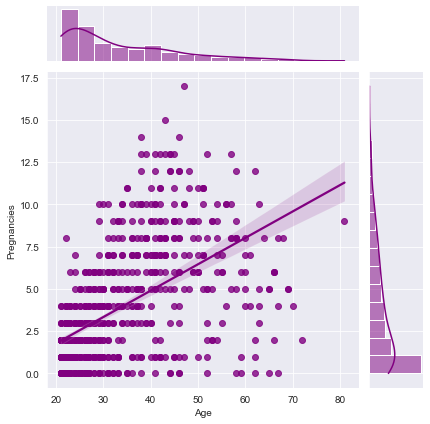

In [69]:
#Gráfico com os valores e a regressão Age e Pregnacies
plt.figure(dpi = 120, figsize = (5,4))
#sns.jointplot(x='Age',y="Pregnancies",data=df2,kind = 'regression',color = 'purple')
sns.jointplot(x='Age',y="Pregnancies",data=df2,kind = 'reg',color = 'purple')
plt.show()

<Figure size 600x480 with 0 Axes>

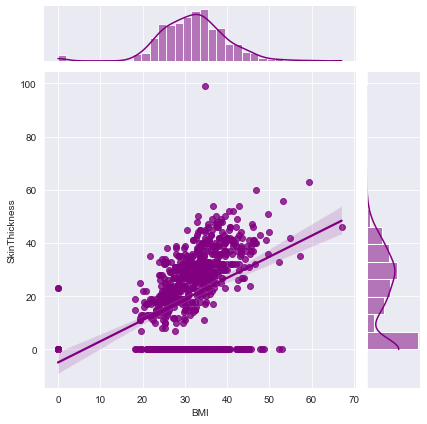

In [70]:
#Gráfico com os valores e a regressão entre Age e Pregnacies
plt.figure(dpi = 120, figsize = (5,4))
#sns.jointplot(x='BMI',y="SkinThickness",data=df2,kind = 'regression',color = 'purple')
sns.jointplot(x='BMI',y="SkinThickness",data=df2,kind = 'reg',color = 'purple')
plt.show()

<Figure size 500x400 with 0 Axes>

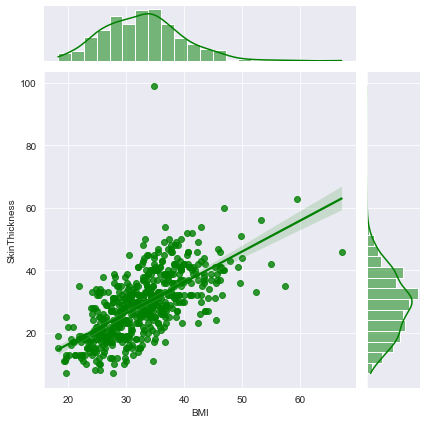

In [71]:
#Gráfico com os valores e a regressão entre Age e Pregnacies
#Sem os outliers - valor 0
df3 = df2[(df2['BMI']>0) & (df2['SkinThickness']>0)]
plt.figure(dpi = 100, figsize = (5,4))
#sns.jointplot(x='BMI',y="SkinThickness",data=df3,kind = 'regression',color = 'green')
sns.jointplot(x='BMI',y="SkinThickness",data=df3,kind = 'reg',color = 'green')
plt.show()

## Inferência Estatística

### Intervalos de confiança

In [53]:
import statsmodels.api as sm
n = df2.shape[0]
print(df2.OutcomeText.value_counts())
diabetic = df2.OutcomeText.value_counts().loc['Diab']
print("\nTotal Observation ==>",n,"\t","Number of Diabetic Patient==> ",diabetic,"\n")
print("\n95% Confidence interval with statsmodels library ==>",sm.stats.proportion_confint(diabetic, n),"\n")
#O resultado indica existe 95% de confiança que 31% a 38% da população tenha diabetes

Non-Diab    500
Diab        268
Name: OutcomeText, dtype: int64

Total Observation ==> 768 	 Number of Diabetic Patient==>  268 


95% Confidence interval with statsmodels library ==> (0.3152483405027714, 0.38266832616389523) 



In [54]:
#Construir um intervalo de confiança de 95% para o número de gravidezes das grávidas com diabetes
df_diabetic = df2[df2.OutcomeText=='Diab']
df_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,OutcomeText
0,6,148,72,35,0,33.6,0.627,50,Diab
2,8,183,64,0,0,23.3,0.672,32,Diab
4,0,137,40,35,168,43.1,2.288,33,Diab
6,3,78,50,32,88,31.0,0.248,26,Diab
8,2,197,70,45,543,30.5,0.158,53,Diab


In [55]:
#Qual a média o número de gravidezes das mulheres grávidas diabéticas com um intervalo de confiança de 95%
print("\n95% Confidence interval with statsmodels library ==>",sm.stats.DescrStatsW(df_diabetic['Pregnancies']).zconfint_mean())


95% Confidence interval with statsmodels library ==> (4.417756079185482, 5.313587204396608)


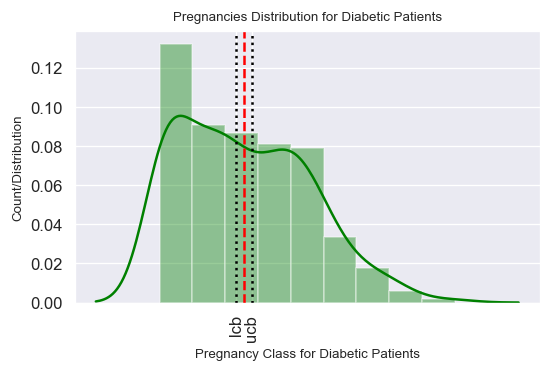

In [56]:
#Gráfico da situação anterior
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(df_diabetic['Pregnancies'],color='green')
plt.axvline(x=4.417756079185482,color = 'black',ls=':')
plt.axvline(x=5.313587204396608,color = 'black',ls=':')
plt.axvline(x=df_diabetic['Pregnancies'].mean(),color='red',ls='--')
plt.xticks([4.417756079185482,5.313587204396608],['lcb','ucb'],rotation=90)
plt.xlabel('Pregnancy Class for Diabetic Patients',fontdict={'fontsize':8})
plt.ylabel('Count/Distribution',fontdict={'fontsize':8})
plt.title('Pregnancies Distribution for Diabetic Patients',fontdict={'fontsize':8}) 
plt.show()


95% Confidence interval with statsmodels library ==> (3.033536970425177, 3.562463029574823)


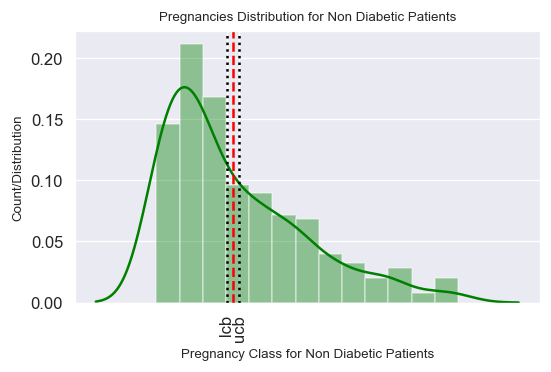

In [57]:
#A mesma questão para não diabéticos
df_non_diabetic = df2[df2.OutcomeText=='Non-Diab']
#Qual a média o número de gravidezes das mulheres grávidas não diabéticas com um intervalo de confiança de 95%
print("\n95% Confidence interval with statsmodels library ==>",sm.stats.DescrStatsW(df_non_diabetic['Pregnancies']).zconfint_mean())
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(df_non_diabetic['Pregnancies'],color='green')
plt.axvline(x=3.0332622455725544,color = 'black',ls=':')
plt.axvline(x=3.5627377544274457,color = 'black',ls=':')
plt.axvline(x=df_non_diabetic['Pregnancies'].mean(),color='red',ls='--')
plt.xticks([3.0332622455725544, 3.5627377544274457],['lcb','ucb'],rotation=90)
plt.xlabel('Pregnancy Class for Non Diabetic Patients',fontdict={'fontsize':8})
plt.ylabel('Count/Distribution',fontdict={'fontsize':8})
plt.title('Pregnancies Distribution for Non Diabetic Patients',fontdict={'fontsize':8}) 
plt.show()

### Testes estatísticos

In [58]:
#Será que a média do número de gravidezes das grávidas diabéticas difere significativamente das não diabéticas
#Population ==> Grávidas diabéticas e não-diabéticas
#Parametro a estudar ==> (μ1 − μ2 ): Grávidas
#μ1 ==> Média de gravidezes das grávidas não diabéticas.
#μ2 ==> Média de gravidezes das grávidas diabéticas.

In [59]:
df2.groupby('OutcomeText').describe()['Pregnancies'].transpose().loc[['mean','std'],:]

OutcomeText,Diab,Non-Diab
mean,4.865672,3.298000
std,3.741239,3.017185


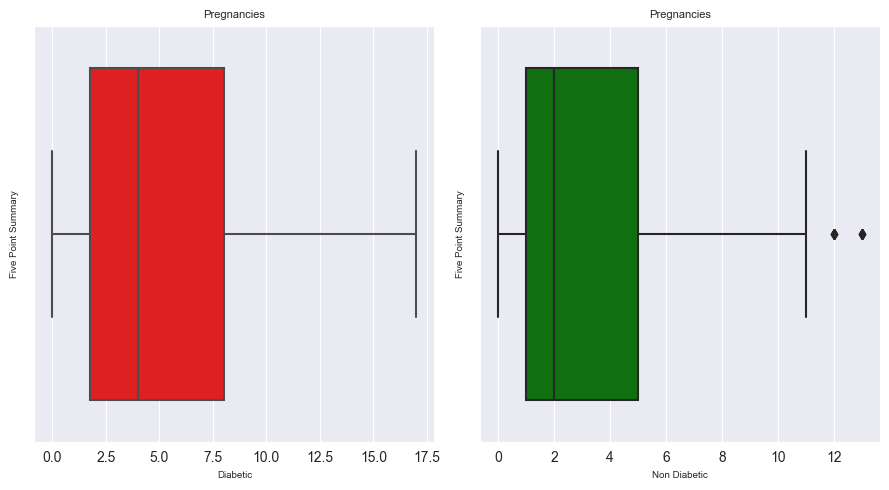

In [60]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=100,figsize = (9,5))

plot0 = sns.boxplot(df_diabetic['Pregnancies'],ax=axes[0],orient='v',color = 'red')
axes[0].set_title('Pregnancies',fontdict={'fontsize':8})
axes[0].set_xlabel('Diabetic',fontdict={'fontsize':7})
axes[0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot1 = sns.boxplot(df_non_diabetic['Pregnancies'],ax=axes[1],orient='v',color='green')
axes[1].set_title('Pregnancies',fontdict={'fontsize':8})
axes[1].set_xlabel('Non Diabetic',fontdict={'fontsize':7})
axes[1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

### Teste T

In [61]:
from scipy import stats
#Verificar a normalidade dos dados
print(stats.shapiro(df_diabetic['Pregnancies']))
print(stats.shapiro(df_non_diabetic['Pregnancies']))
#Verificar se as variâncias são iguais
print(stats.levene(df_diabetic['Pregnancies'], df_non_diabetic['Pregnancies']))
#Testar se as médias são diferentes
print(stats.ttest_ind(df_diabetic['Pregnancies'], df_non_diabetic['Pregnancies'], equal_var=True))

ShapiroResult(statistic=0.9432291388511658, pvalue=1.157515949756771e-08)
ShapiroResult(statistic=0.8792547583580017, pvalue=2.685604968330442e-19)
LeveneResult(statistic=22.74716691051014, pvalue=2.212165915740029e-06)
Ttest_indResult(statistic=6.298430550035151, pvalue=5.065127298053476e-10)


In [64]:
#Teste com outra biblioteca
#!pip install pingouin
import pingouin as pg
pg.ttest(df_diabetic['Pregnancies'], df_non_diabetic['Pregnancies'], correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.298431,766,two-sided,5.065127e-10,"[1.08, 2.06]",0.476827,1.51e+07,1.0


In [65]:
#Será que a média do número de gravidezes das grávidas diabéticas é mais alta que as não diabéticas
#μ1 ==> Média de gravidezes das grávidas não diabéticas.
#μ2 ==> Média de gravidezes das grávidas diabéticas.
#Null: Não existe diferença significativa entre as médias das idades das grávidas
#Alternative: Existe diferença significativa entre as médias das idades das grávidas
#Significance Level = 5%
z,p_value = sm.stats.ztest(df_diabetic['Pregnancies'],df_non_diabetic['Pregnancies'])
print("P-Value is ==> ",p_value)
#Dado o p-value < 0.05 rejeita-se a hipótese nula (H0) que é a das grávidas possuirem a mesma média

P-Value is ==>  3.006743856829293e-10


### ANOVA - Análise da variância

In [66]:
#Testar com a Anova se as médias das gravidezes são iguais para diabéticos e não diabéticos
from statsmodels.formula.api import ols
import scipy
model = ols('Pregnancies~C(Outcome)', data=df).fit() 
#A utilização do C() é para que o tratmento da variável aí contida seja com categórica
print(model.summary())
#Como o valor de Prob (F-statistic) é inferior a 0.05 e por isso rejeitamos a hipótese nula (H0), ou seja, 
#as médias não são singificativamente diferentes
print(sm.stats.anova_lm(model, typ=1))
print(scipy.stats.f(1,766).ppf(0.95))

                            OLS Regression Results                            
Dep. Variable:            Pregnancies   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     39.67
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           5.07e-10
Time:                        12:30:26   Log-Likelihood:                -2002.8
No. Observations:                 768   AIC:                             4010.
Df Residuals:                     766   BIC:                             4019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.2980      0.147     

### Análise da regressão

In [67]:
#Como o outcome são valores só 0 e 1 vamos verificar outras duas variáveis que estejam relacionadas
#Ao olhar para uma das figuras que mostram o cruzamento entre todas as variáveis é possível 
#verificar que a variável BMI e SkinThickness aparentam estar relacionadas (na figura com as correlações é
#possível ver que tem um dos valores mais altos de correlação - 0.39)
#Vamos retirar os 0s como já fizemos anteriormente, ou seja, vamos utilizar o df3
from statsmodels.formula.api import ols
import scipy
model = ols('BMI~SkinThickness', data=df3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     389.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           1.47e-65
Time:                        12:30:31   Log-Likelihood:                -1656.3
No. Observations:                 539   AIC:                             3317.
Df Residuals:                     537   BIC:                             3325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.5061      0.667     30.728

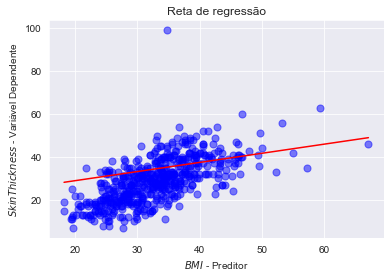

In [68]:
#Apresentar um gráfico com os dados e a reta de regressão
plt.scatter(y=df3.SkinThickness, x=df3.BMI, color='blue', s=50, alpha=.5)
X_plot = scipy.linspace(min(df3.BMI), max(df3.BMI), len(df3.BMI))
plt.plot(X_plot, X_plot*model.params[1] + model.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('$SkinThickness$ - Variável Dependente')
plt.xlabel('$BMI$ - Preditor')
plt.show()